In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
kpis = {"KPI": [],"Value": []}

In [67]:
df = pd.read_csv("../data/cleaned_superstore.csv")
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,TotalChildren,Customer_Since_Years,HasChildren
0,1826,1970,Graduate,Divorced,84835.0,0,0,2014-06-16,0,189,...,4,4,6,1,1,0,44,0,0,No
1,1,1961,Graduate,Single,57091.0,0,0,2014-06-15,0,464,...,7,3,7,5,1,0,53,0,0,No
2,10476,1958,Graduate,Married,67267.0,0,1,2014-05-13,0,134,...,3,2,5,2,0,0,56,1,0,Yes
3,1386,1967,Graduate,Together,32474.0,1,1,2014-11-05,0,10,...,1,0,2,7,0,0,47,2,0,Yes
4,5371,1989,Graduate,Single,21474.0,1,0,2014-08-04,0,6,...,3,1,2,7,1,0,25,1,0,Yes


In [ ]:
total_customers = df["Id"].nunique()

kpis["KPI"].append("Total Customers")
kpis["Value"].append(total_customers)

print(f"🔢 Total Customers: {total_customers}")

🔢 Total Customers: 2205


📈 Average Age: 45.10


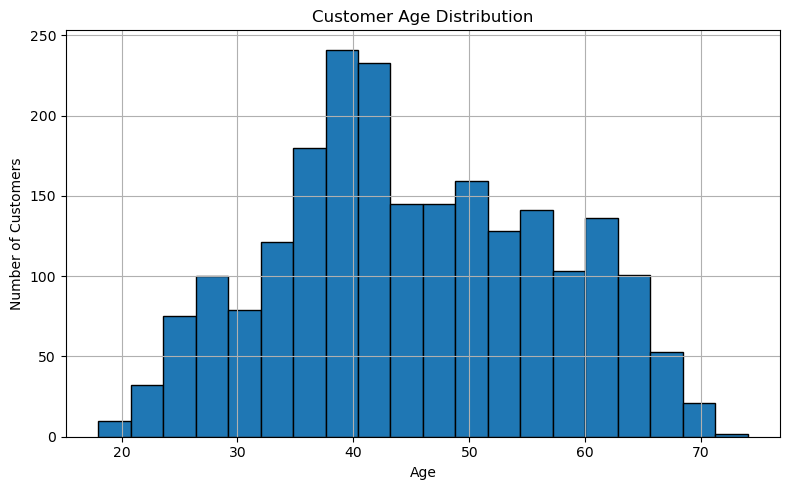

In [ ]:
avg_age = df["Age"].mean()

kpis["KPI"].append("Average Age")
kpis["Value"].append(round(avg_age, 2))

print(f"📈 Average Age: {avg_age:.2f}")

plt.figure(figsize=(8, 5))
df["Age"].hist(bins=20, edgecolor="black")
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.savefig("../plots/customer_kpis/customer_age_distribution.png")
plt.show()


👨‍👩‍👧‍👦 % With Children: 71.43%


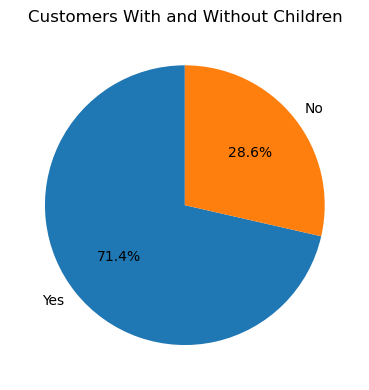

In [ ]:
pct_with_children = (df["HasChildren"] == "Yes").mean() * 100

kpis["KPI"].append("% With Children")
kpis["Value"].append(f"{pct_with_children:.2f}%")

print(f"👨‍👩‍👧‍👦 % With Children: {pct_with_children:.2f}%")

child_counts = df["HasChildren"].value_counts()

kpis["KPI"].append("Children Distribution")
kpis["Value"].append("; ".join([f"{k}: {v}" for k, v in child_counts.items()]))

plt.figure(figsize=(6, 4))
child_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Customers With and Without Children")
plt.ylabel("")
plt.tight_layout()
plt.savefig("../plots/customer_kpis/with_children_distribution.png")
plt.show()

📅 Avg Customer Tenure: 0.97 years


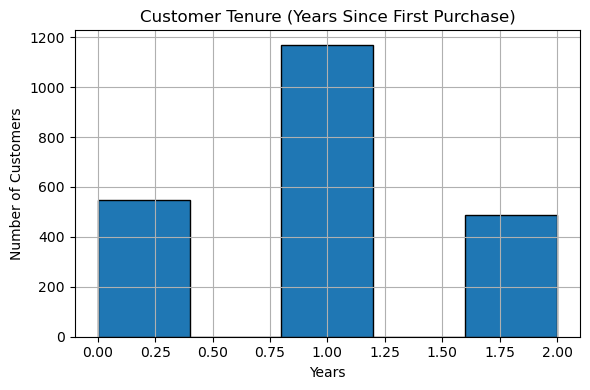

In [ ]:
avg_tenure = df["Customer_Since_Years"].mean()

kpis["KPI"].append("Average Customer Tenure (Years)")
kpis["Value"].append(round(avg_tenure, 2))  

print(f"📅 Avg Customer Tenure: {avg_tenure:.2f} years")

plt.figure(figsize=(6, 4))
df["Customer_Since_Years"].hist(bins=5, edgecolor="black")
plt.title("Customer Tenure (Years Since First Purchase)")
plt.xlabel("Years")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.savefig("../plots/customer_kpis/customer_tenure_distribution.png")
plt.show()

Marital_Status
Married     38.87
Together    25.90
Single      21.32
Divorced    10.48
Widow        3.45
Name: proportion, dtype: float64


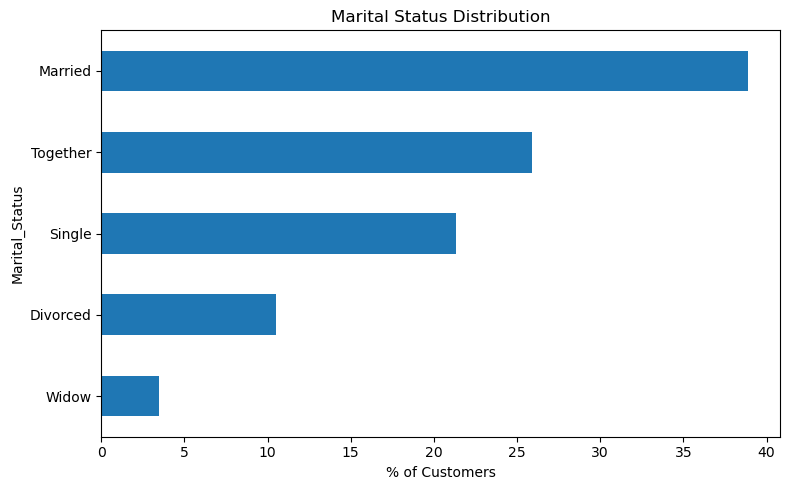

In [72]:
marital_dist = df["Marital_Status"].value_counts(normalize=True) * 100
kpis["KPI"].append("Marital Status Distribution")
kpis["Value"].append("; ".join([f"{k}: {v:.2f}%" for k, v in marital_dist.items()]))

print(marital_dist.round(2))

plt.figure(figsize=(8, 5))
marital_dist.sort_values().plot(kind="barh")
plt.title("Marital Status Distribution")
plt.xlabel("% of Customers")
plt.tight_layout()
plt.savefig("../plots/customer_kpis/marital_status_distribution.png")
plt.show()

Education
Graduate         50.48
Postgraduate     38.10
Undergraduate    11.43
Name: proportion, dtype: float64


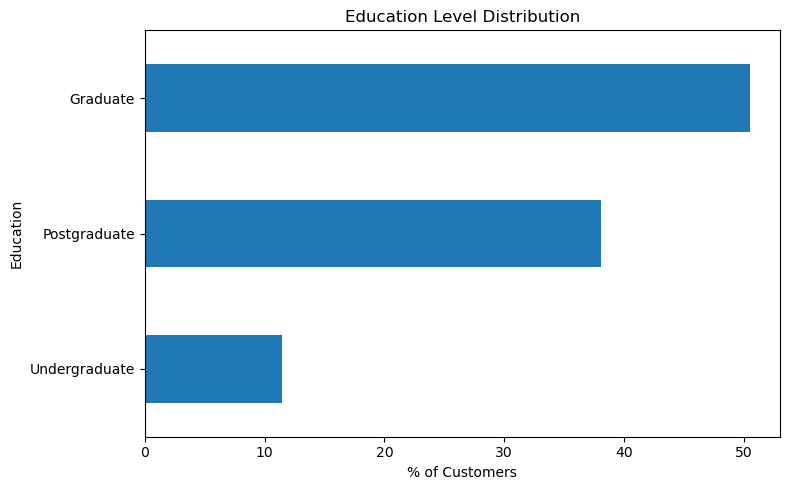

In [ ]:
edu_dist = df["Education"].value_counts(normalize=True) * 100

kpis["KPI"].append("Education Level Distribution")
kpis["Value"].append("; ".join([f"{k}: {v:.2f}%" for k, v in edu_dist.items()]))

print(edu_dist.round(2))

plt.figure(figsize=(8, 5))
edu_dist.sort_values().plot(kind="barh")
plt.title("Education Level Distribution")
plt.xlabel("% of Customers")
plt.tight_layout()
plt.savefig("../plots/customer_kpis/education_level_distribution.png")
plt.show()

Customer_Year
2012     487
2013    1169
2014     549
Name: count, dtype: int64


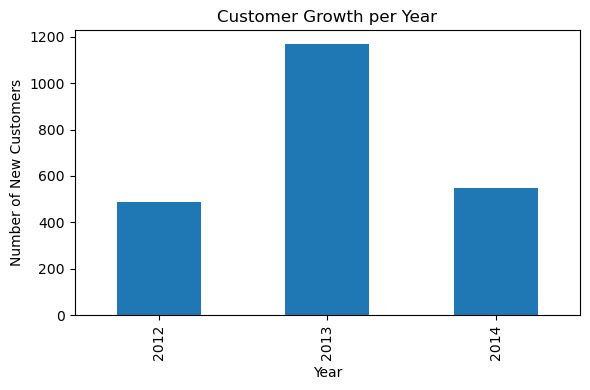

In [74]:
df["Customer_Year"] = pd.to_datetime(df["Dt_Customer"]).dt.year

growth_per_year = df["Customer_Year"].value_counts().sort_index()

print(growth_per_year)

kpis["KPI"].append("Customer Growth per Year")
kpis["Value"].append("; ".join([f"{year}: {count}" for year, count in growth_per_year.items()]))

plt.figure(figsize=(6, 4))
growth_per_year.plot(kind="bar")
plt.title("Customer Growth per Year")
plt.xlabel("Year")
plt.ylabel("Number of New Customers")
plt.tight_layout()
plt.savefig("../plots/customer_kpis/customer_growth_per_year.png")
plt.show()

In [75]:
complaint_rate = (df["Complain"] == 1).mean() * 100

kpis["KPI"].append("Complaint Rate")
kpis["Value"].append(f"{complaint_rate:.2f}%")

print(f"Complaint Rate: {complaint_rate:.2f}%")

Complaint Rate: 0.91%


In [ ]:
response_rate = (df["Response"] == 1).mean() * 100

kpis["KPI"].append("Response Rate")
kpis["Value"].append(f"{response_rate:.2f}%")

print(f"Response Rate: {response_rate:.2f}%")

Response Rate: 14.97%


ActiveStatus
Passive    67.66
Active     32.34
Name: proportion, dtype: float64


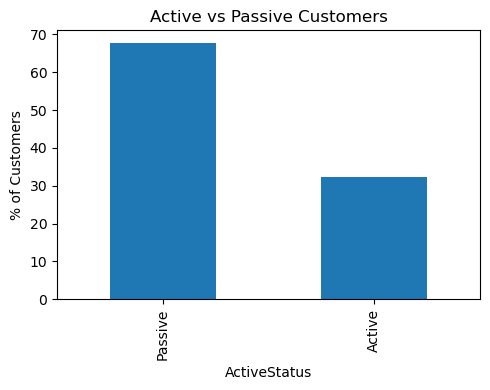

In [77]:
df["ActiveStatus"] = df["Recency"].apply(lambda x: "Active" if x <= 30 else "Passive")

active_dist = df["ActiveStatus"].value_counts(normalize=True) * 100

kpis["KPI"].append("Active vs Passive Customers")
kpis["Value"].append("; ".join([f"{k}: {v:.2f}%" for k, v in active_dist.items()]))

print(active_dist.round(2))


plt.figure(figsize=(5, 4))
active_dist.plot(kind="bar", title="Active vs Passive Customers")
plt.ylabel("% of Customers")
plt.tight_layout()
plt.savefig("../plots/customer_kpis/active_vs_passive_customers.png")
plt.show()

In [78]:
pd.DataFrame(kpis).to_csv("../exports/customer_kpis_summary.csv", index=False)